<a href="https://colab.research.google.com/github/Ferevr/ML_Mensajes_sexistas/blob/main/Preprocesado_y_representaci%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALACION E IMPORTACIÓN DE LIBRERIAS

**1. Se conecta el google drive y se establece la ubicacion de los archivos**



In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/EstanciaDelfin/Proyecto Final")

Mounted at /content/drive


In [3]:
#!pip install mglearn
!python -m spacy download es_core_news_sm
#!pip install -U kaleido

2023-07-18 20:10:09.473111: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-18 20:10:10.701772: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 38.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [4]:
import pandas
import matplotlib.pyplot as plt
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import my_functions
from my_functions import *
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


#%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#LECTURA Y PREPROCESADO DE LOS DATOS

In [5]:
DataDT = pandas.read_table("EXIST2021_training.tsv")
pandas.read_table("EXIST2021_training.tsv")

,test_case,id,source,language,text,task1,task2
0,EXIST2021,1,twitter,en,"She calls herself ""anti-feminazi"" how about sh...",sexist,ideological-inequality
1,EXIST2021,2,twitter,en,"Now, back to these women, the brave and the be...",non-sexist,non-sexist
2,EXIST2021,3,twitter,en,"@CurvyBandida @Xalynne_B Wow, your skirt is ve...",sexist,objectification
3,EXIST2021,4,twitter,en,@AurelieGuiboud Incredible! Beautiful!But I l...,non-sexist,non-sexist
4,EXIST2021,5,twitter,en,i find it extremely hard to believe that kelly...,non-sexist,non-sexist
...,...,...,...,...,...,...,...
6972,EXIST2021,6973,twitter,es,"Estamos igual sin pareja, pero puedes besar a ...",non-sexist,non-sexist
6973,EXIST2021,6974,twitter,es,2020 hijo de re mil putas,non-sexist,non-sexist
6974,EXIST2021,6975,twitter,es,SEGURAMENTE ESTA CHICA NO COBRA EL DINERO QUE ...,non-sexist,non-sexist
6975,EXIST2021,6976,twitter,es,@safetyaitana mi madre dice q va fea y i agree,sexist,objectification


In [6]:
FDATA = DataDT.loc[DataDT["task2"] != "non-sexist"]
FDATA.to_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/SexistData.csv")

In [7]:
#Separación y guardado de los datos
temp = DataDT.loc[DataDT["task1"] == "non-sexist"]

Sexista_en = FDATA.loc[FDATA["language"] != "es"]
Nosexista_en = temp.loc[temp["language"] == "en"]
Sexista_es = FDATA.loc[FDATA["language"] != "en"]
Nosexista_es = temp.loc[temp["language"] == "es"]

In [8]:
PRP_en = preprocesaTexto(idioma = "en", _tokeniza = False, _aMinusculas = True, _aMayusculas = False, _removerPuntuacion=True,
                      _removerCaracteresRaros=True, _quitarNumeros=False, _lematiza=False, _stemming=False, _quitarAcentos=True,
                      _remueveStop=False, _muestraCambios=False)

PRP_es = preprocesaTexto(idioma = "es", _tokeniza = False, _aMinusculas = True, _aMayusculas = False, _removerPuntuacion=True,
                      _removerCaracteresRaros=True, _quitarNumeros=False, _lematiza=False, _stemming=False, _quitarAcentos=True,
                      _remueveStop=False, _muestraCambios=False)

Stext = pandas.read_csv("EXIST2021_training.tsv", usecols=[4], sep="\t")
TextList = Stext.text.to_list()
PreprocesedText = []

i=0
while i < len(TextList):
  PreprocesedText.append(PRP_en.preprocesa(TextList[i]))
  i+=1

PreprocesedText[0]

'she calls herself antifeminazi how about shut the fucking up on your vile commentary on an elderly responsible citizen tu sach muuch ghani baawribewdi hai bey httpstcozmxtdwsy5d'

In [9]:
#NO SEX INGLES
i=0
data = pandas.read_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/No_Sexista_ingles.csv", usecols = [5])
temp = data.text.to_list()
PNST_en = []
while i < len(temp):
  PNST_en.append(PRP_en.preprocesa(temp[i]))
  i+=1

#SEX INGLES
i=0
data = pandas.read_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/Sexista_ingles.csv", usecols = [5])
temp = data.text.to_list()
PST_en = []
while i < len(temp):
  PST_en.append(PRP_en.preprocesa(temp[i]))
  i+=1

#NO SEX ESPAÑOL
i=0
data = pandas.read_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/No_Sexista_español.csv", usecols = [5])
temp = data.text.to_list()
PNST_es = []
while i < len(temp):
  PNST_es.append(PRP_es.preprocesa(temp[i]))
  i+=1

#SEX ESPAÑOL
i=0
data = pandas.read_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/Sexista_español.csv", usecols = [5])
temp = data.text.to_list()
PST_es = []
while i < len(temp):
  PST_es.append(PRP_es.preprocesa(temp[i]))
  i+=1

#BOLSAS DE PALABRAS

**Bolsa de palabras no binaria**

In [10]:
Vectorizer = CountVectorizer(lowercase = False, ngram_range = (1,1), max_features=10000)
X = Vectorizer.fit_transform(PreprocesedText)
BOW = X.toarray()
BOW_Table = pandas.DataFrame(BOW, columns = Vectorizer.get_feature_names_out())
BOW_Table[:5]

,016,0181935712please,03,056,062,091,10,100,1000,100s,...,zero,zeus,zimbabwe,zona,zopi,zorra,zorras,zorro,zurda,zytjavier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
BOW_Table.to_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/Bolsa de palabras/BOFW_G.csv")

**Bolsa de palabras binaria**

In [11]:
Vectorizer = CountVectorizer(lowercase = False, ngram_range = (1,1), binary = True, max_features=10000)
X = Vectorizer.fit_transform(PreprocesedText)
BBOW = X.toarray()
BBOW_Table = pandas.DataFrame(BBOW, columns = Vectorizer.get_feature_names_out())
BBOW_Table[:5]

,016,0181935712please,062,091,10,100,1000,100s,10k,10pm,...,zen,zero,zeus,zimbabwe,zona,zopi,zorra,zorras,zurda,zytjavier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
BBOW_Table.to_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/Bolsa de palabras/BBOFW.csv")

In [ ]:
'''
cos_sim = cosine_similarity(BBOW, BBOW)
sim_df = pandas.DataFrame(cos_sim)

f, ax = plt.subplots(figsize=(7, 5))
hm = seaborn.heatmap(sim_df, annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
            xticklabels = False, yticklabels = False)
f.subplots_adjust(top=0.93)
t= f.suptitle('Similaridad Coseno Heatmap', fontsize=14)
'''

#ANALISIS DE LOS DATOS

**Analisis de datos: Frecuencias**

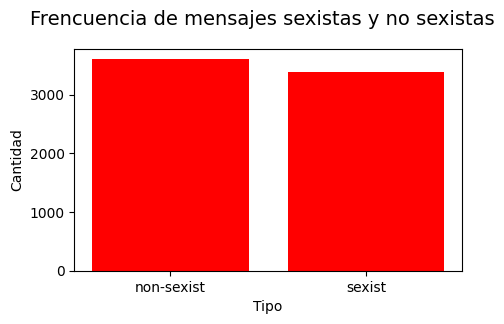

In [12]:
fig = plt.figure(figsize= (5,3))
title = fig.suptitle("Frencuencia de mensajes sexistas y no sexistas", fontsize = 14)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel("Tipo")
ax1.set_ylabel("Cantidad")
Nsexist = DataDT["task1"].value_counts()
Nsexist = (list(Nsexist.index), list(Nsexist.values))
ax1.tick_params(axis='both', which='major', labelsize=10)
bar = ax1.bar(Nsexist[0], Nsexist[1], color='Red', edgecolor='black', linewidth=0)

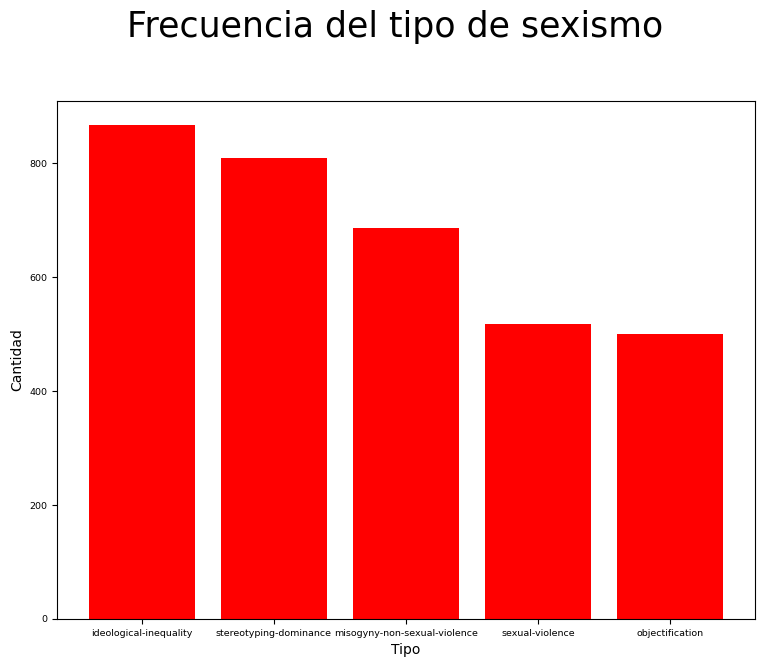

In [13]:
fig = plt.figure(figsize= (9,7))
title = fig.suptitle("Frecuencia del tipo de sexismo", fontsize = 25)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax2 = fig.add_subplot(1,1,1)
ax2.set_xlabel("Tipo")
ax2.set_ylabel("Cantidad")
Tsexism = FDATA["task2"].value_counts()
Tsexism = (list(Tsexism.index), list(Tsexism.values))
ax2.tick_params(axis='both', which='major', labelsize=6.8)
bar = ax2.bar(Tsexism[0], Tsexism[1], color='Red', edgecolor='black', linewidth=0)

In [14]:
#sexista ingles
Sexista_en["tokens"] = 0
i = 0
while i < len(Sexista_en):
  temp = PST_en[i]
  temp2 = temp.split()
  Sexista_en["tokens"].iloc[i] = len(temp2)
  i+=1

#no sexista ingles
Nosexista_en["tokens"] = 0
i = 0
while i < len(Nosexista_en):
  temp = PNST_en[i]
  temp2 = temp.split()
  Nosexista_en["tokens"].iloc[i] = len(temp2)
  i+=1

#sexista español
Sexista_es["tokens"] = 0
i = 0
while i < len(Sexista_es):
  temp = PST_es[i]
  temp2 = temp.split()
  Sexista_es["tokens"].iloc[i] = len(temp2)
  i+=1

#no sexista español
Nosexista_es["tokens"] = 0
i = 0
while i < len(Nosexista_es):
  temp = PNST_es[i]
  temp2 = temp.split()
  Nosexista_es["tokens"].iloc[i] = len(temp2)
  i+=1

<ipython-input-14-8b29ecba73fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sexista_en["tokens"] = 0
<ipython-input-14-8b29ecba73fa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sexista_en["tokens"].iloc[i] = len(temp2)
<ipython-input-14-8b29ecba73fa>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Nosexista_en["tokens"].iloc[i] = len(temp2)
<ipython-input-14-8b29ecba7

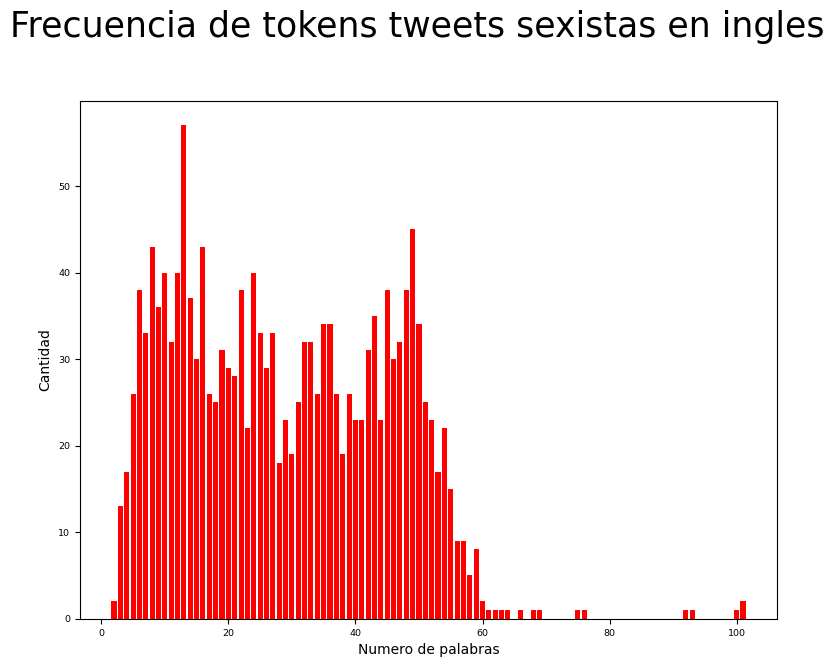

In [15]:
#Sexista_en
fig = plt.figure(figsize= (9,7))
title = fig.suptitle("Frecuencia de tokens tweets sexistas en ingles", fontsize = 25)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax2 = fig.add_subplot(1,1,1)
ax2.set_xlabel("Numero de palabras")
ax2.set_ylabel("Cantidad")
Tsexism = Sexista_en["tokens"].value_counts()
Tsexism = (list(Tsexism.index), list(Tsexism.values))
ax2.tick_params(axis='both', which='major', labelsize=6.8)
bar = ax2.bar(Tsexism[0], Tsexism[1], color='Red', edgecolor='black', linewidth=0)

In [ ]:
Nosexista_en

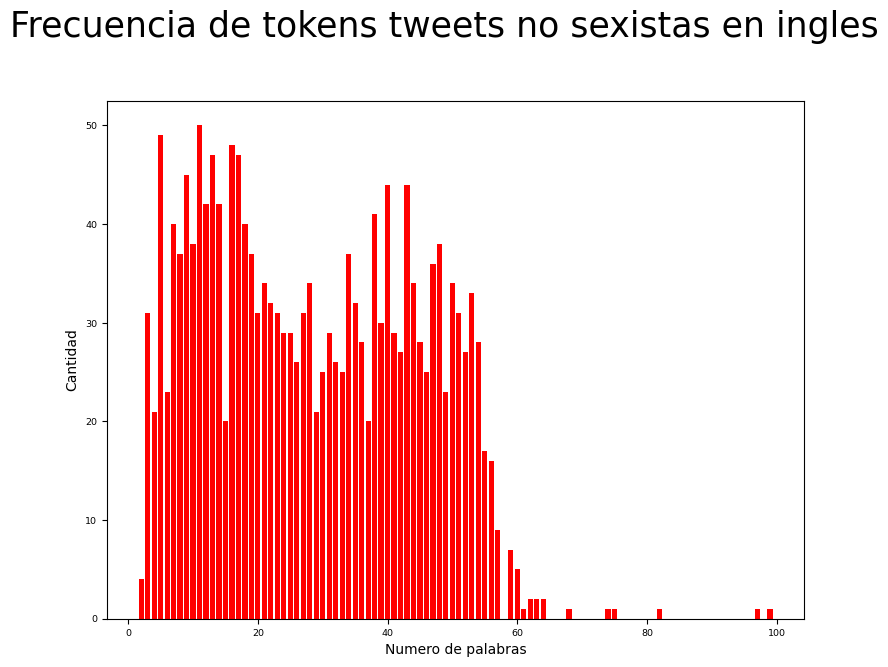

In [16]:
#NO Sexista_en
fig = plt.figure(figsize= (9,7))
title = fig.suptitle("Frecuencia de tokens tweets no sexistas en ingles", fontsize = 25)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax2 = fig.add_subplot(1,1,1)
ax2.set_xlabel("Numero de palabras")
ax2.set_ylabel("Cantidad")
Tsexism = Nosexista_en["tokens"].value_counts()
Tsexism = (list(Tsexism.index), list(Tsexism.values))
ax2.tick_params(axis='both', which='major', labelsize=6.8)
bar = ax2.bar(Tsexism[0], Tsexism[1], color='Red', edgecolor='black', linewidth=0)

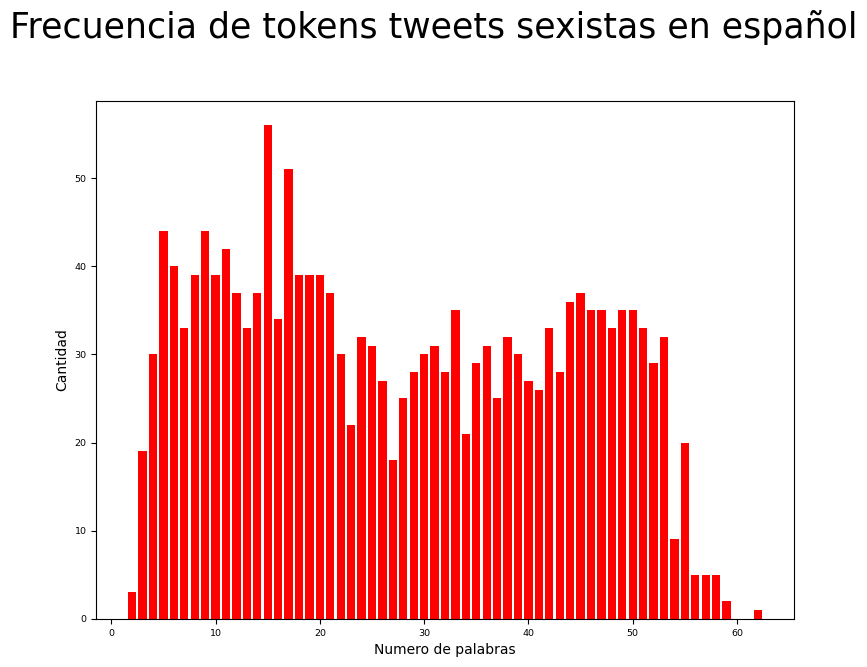

In [17]:
#Sexista_es
fig = plt.figure(figsize= (9,7))
title = fig.suptitle("Frecuencia de tokens tweets sexistas en español", fontsize = 25)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax2 = fig.add_subplot(1,1,1)
ax2.set_xlabel("Numero de palabras")
ax2.set_ylabel("Cantidad")
Tsexism = Sexista_es["tokens"].value_counts()
Tsexism = (list(Tsexism.index), list(Tsexism.values))
ax2.tick_params(axis='both', which='major', labelsize=6.8)
bar = ax2.bar(Tsexism[0], Tsexism[1], color='Red', edgecolor='black', linewidth=0)

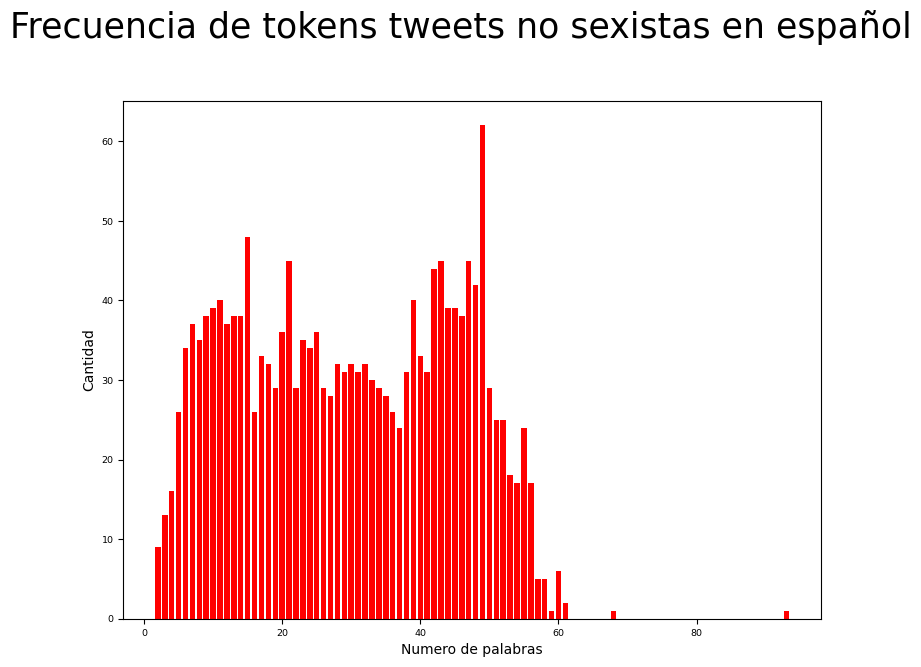

In [18]:
#No Sexista_es
fig = plt.figure(figsize= (9,7))
title = fig.suptitle("Frecuencia de tokens tweets no sexistas en español", fontsize = 25)
fig.subplots_adjust(top = 0.85, wspace = 0.3)

ax2 = fig.add_subplot(1,1,1)
ax2.set_xlabel("Numero de palabras")
ax2.set_ylabel("Cantidad")
Tsexism = Nosexista_es["tokens"].value_counts()
Tsexism = (list(Tsexism.index), list(Tsexism.values))
ax2.tick_params(axis='both', which='major', labelsize=6.8)
bar = ax2.bar(Tsexism[0], Tsexism[1], color='Red', edgecolor='black', linewidth=0)

#WORDCLOUDS

**WORDCLOUD SEXISTA EN INGLES**

In [19]:
LSexista_en = []
i=0
while i < len(Sexista_en):
  LSexista_en.append(PRP_en.preprocesa(Sexista_en.iloc[i][4]))
  i+=1

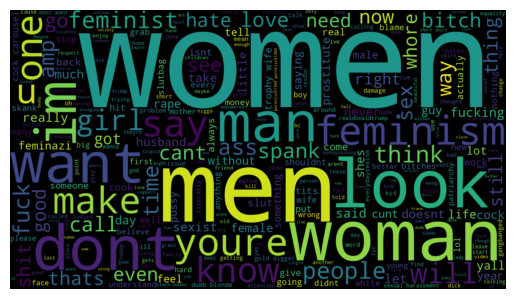

In [29]:
#NUBE SEXISTA INGLES
Ctext = " ".join(review for review in LSexista_en)
wordcloud = WordCloud(width = 1920, height = 1080, max_words = 300).generate(Ctext)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

**WORDCLOUD NO SEXISTA EN INGLES**

In [20]:
LNosexista_en = []
i=0
while i < len(Nosexista_en):
  LNosexista_en.append(PRP_en.preprocesa(Nosexista_en.iloc[i][4]))
  i+=1

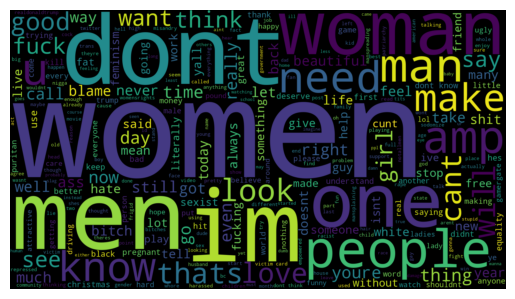

In [31]:
C2text = " ".join(review for review in LNosexista_en)
wordcloud2 = WordCloud(width = 1920, height = 1080, max_words = 300).generate(C2text)
plt.imshow(wordcloud2, interpolation = "bilinear")
plt.axis("off")
plt.show()

**WORDCLOUD SEXISTA ESPAÑOL**

In [21]:
StopW = []
File = open("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/spanish.txt")
data = File.read()
StopW = data.split("\n")
File.close()

In [22]:
LSexista_es = []
i=0
while i < len(Sexista_es):
  LSexista_es.append(PRP_es.preprocesa(Sexista_es.iloc[i][4]))
  i+=1

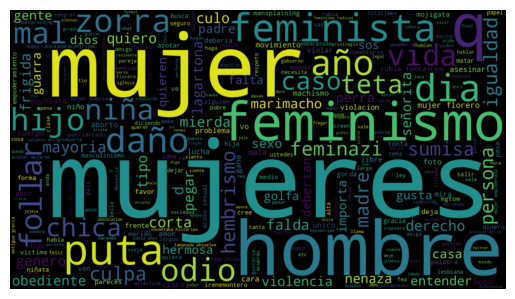

In [34]:
C3text = " ".join(review for review in LSexista_es)
wordcloud3 = WordCloud(width = 1920, height = 1080, max_words = 300, stopwords = (StopW)).generate(C3text)
plt.imshow(wordcloud3, interpolation = "bilinear")
plt.axis("off")
plt.show()

**WORCLOUD NO SEXISTA EN ESPAÑOL**

In [23]:
Lnosexista_es = []
i=0
while i < len(Nosexista_es):
  Lnosexista_es.append(PRP_es.preprocesa(Nosexista_es.iloc[i][4]))
  i+=1

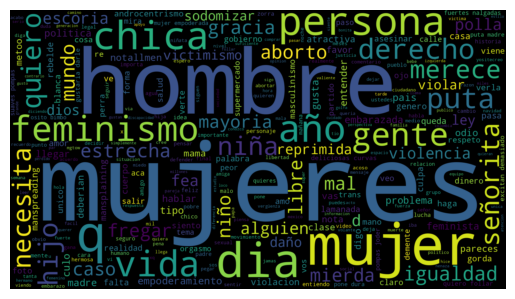

In [36]:
C4text = " ".join(review for review in Lnosexista_es)
wordcloud4 = WordCloud(width = 1920, height = 1080, max_words = 300, stopwords = (StopW)).generate(C4text)
plt.imshow(wordcloud4, interpolation = "bilinear")
plt.axis("off")
plt.show()

**GUARDADO DE WORDCLOUDS Y CSV**

In [37]:
wordcloud4.to_file("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/WordClouds/wordcloud_español_no_sexista.png")

In [38]:
wordcloud3.to_file("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/WordClouds/wordcloud_español_sexista.png")

In [39]:
wordcloud2.to_file("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/WordClouds/wordcloud_ingles_no_sexista.png")

In [40]:
wordcloud.to_file("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/WordClouds/wordcloud_ingles_sexista.png")

In [41]:
Sexista_en.to_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/Sexista_ingles.csv")
Sexista_es.to_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/Sexista_español.csv")
Nosexista_en.to_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/No_Sexista_ingles.csv")
Nosexista_es.to_csv("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/No_Sexista_español.csv")

#PCA

**PCA - Bolsa de palabras binaria**

In [24]:
pca = PCA(n_components = 5)
pca.fit(BBOW)
proj = pandas.DataFrame(pca.transform(BBOW),columns = ['pc1','pc2','pc3','pc4','pc5'])
pca_bbow = pandas.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': DataDT['task2']})

fig = px.scatter(pca_bbow, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

**PCA - one hot encoding**

In [25]:
pca = PCA(n_components = 5)
pca.fit(BOW)
proj = pandas.DataFrame(pca.transform(BOW),columns = ['pc1','pc2','pc3','pc4','pc5'])


In [26]:
pca_bow = pandas.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': DataDT['task2']})

In [27]:
fig = px.scatter(pca_bow, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

**Distancia coseno**

In [ ]:
'''pca = PCA(n_components = 5)
pca.fit(cos_sim)
proj = pandas.DataFrame(pca.transform(cos_sim),columns = ['pc1','pc2','pc3','pc4','pc5'])

Est_pca_bow = pandas.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': DataDT['task2']})

fig = px.scatter(Est_pca_bow, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()'''

**ESTANDARIZACIÓN DE LOS DATOS**

In [28]:
SS = StandardScaler()
Est_Bow = SS.fit_transform(BOW)

In [29]:
pca = PCA(n_components = 5)
pca.fit(Est_Bow)
proj = pandas.DataFrame(pca.transform(Est_Bow),columns = ['pc1','pc2','pc3','pc4','pc5'])

Est_pca_bow = pandas.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': DataDT['task2']})

fig = px.scatter(Est_pca_bow, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,
)
fig.show()

In [ ]:
#fig.write_image("/content/drive/My Drive/EstanciaDelfin/Proyecto Final/Exports/PCA_Estandarizado.png", engine = "kaleido")

**TF - IDF**

In [43]:
vectorizer = TfidfVectorizer(lowercase=False, ngram_range= (1,1), max_features=10000)
X = vectorizer.fit_transform(PreprocesedText)
tfidf = X.toarray()
tfidf_df = pandas.DataFrame(tfidf,columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,016,0181935712please,03,056,062,091,10,100,1000,100s,...,zero,zeus,zimbabwe,zona,zopi,zorra,zorras,zorro,zurda,zytjavier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
pca = PCA(n_components=5)
pca.fit(tfidf)
# proyectar datos
proj = pandas.DataFrame(pca.transform(tfidf),columns = ['pc1','pc2','pc3','pc4','pc5'])
pca_tfidf = pandas.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': DataDT['task2']})

In [32]:
# Grafica interactiva
fig = px.scatter(pca_tfidf, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(autosize=False, width=600, height=600)
fig.show()

In [ ]:
'''
cos_sim = cosine_similarity(tfidf, tfidf)
sim_df = pandas.DataFrame(cos_sim)

f, ax = plt.subplots(figsize=(7, 5))
hm = seaborn.heatmap(sim_df, annot=False, ax=ax, cmap="coolwarm",fmt='.2f',
            xticklabels = False, yticklabels = False)
f.subplots_adjust(top=0.93)
t= f.suptitle('Similaridad Coseno Heatmap', fontsize=14)
'''

In [ ]:
'''
pca = PCA(n_components=5)
pca.fit(cos_sim)
# proyectar datos
proj = pandas.DataFrame(pca.transform(cos_sim),columns = ['pc1','pc2','pc3','pc4','pc5'])

pca_bow = pandas.DataFrame({'pc1': proj['pc1'], 'pc2': proj['pc2'], 'tipo': DataDT['task2']})

# Grafica interactiva
fig = px.scatter(pca_bow, x='pc1', y='pc2', hover_data=['tipo'], color = 'tipo')
fig.update_layout(autosize=False, width=600, height=600)
fig.show()
'''

#**Regresión Logística - Bolsa de Palabras**

**1. Entrenamiento del modelo**

In [104]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(Est_Bow, DataDT["task2"])

LogisticRegression(max_iter=10000)

**2. Prediccion de la categoria de los textos**

In [33]:
TestData = pandas.read_csv("EXIST2021_test_labeled.tsv", sep="\t")
TestData

,test_case,id,source,language,text,task1,task2
0,EXIST2021,6978,gab,en,Pennsylvania State Rep horrifies with opening ...,non-sexist,non-sexist
1,EXIST2021,6979,twitter,en,"@iilovegrapes He sounds like as ass, and very ...",non-sexist,non-sexist
2,EXIST2021,6980,twitter,en,"@averyangryskel1 @4ARealistParty LOL! ""This be...",sexist,ideological-inequality
3,EXIST2021,6981,twitter,en,@WanderOrange @stalliontwink Rights?I mean yea...,sexist,ideological-inequality
4,EXIST2021,6982,twitter,en,the jack manifold appreciation i’m seeing is o...,non-sexist,non-sexist
...,...,...,...,...,...,...,...
4363,EXIST2021,11341,twitter,es,"@IreneMontero Se llama nota de corte, y es lo ...",non-sexist,non-sexist
4364,EXIST2021,11342,twitter,es,@freckles887 Osea todo atack of titan parte de...,non-sexist,non-sexist
4365,EXIST2021,11343,twitter,es,@alabadomango Cuéntame más!!Es por androcentri...,sexist,ideological-inequality
4366,EXIST2021,11344,gab,es,Que duro es ser tan atractiva como Jaba de Hutt.,sexist,objectification


In [34]:
temp = TestData["text"]
PList = temp.to_list()
Prediction_Text = []

i=0
while i < len(PList):
  Prediction_Text.append(PRP_en.preprocesa(PList[i]))
  i+=1

Prediction_Text[0]

'pennsylvania state rep horrifies with opening prayermooslime politican movita johnsonharrell offended by the word jesus and godin a mainly christian country praying to godjesus  what a scandal sarc its the wellknown mooslime strategy playing the victim card and make demandshttpstruepunditcompennsylvaniastaterephorrifiesdemocratswithopeningprayeratthenameofjesuseverykneewillbow'

In [35]:
X = Vectorizer.fit_transform(Prediction_Text)
PBOW = X.toarray()
PBOW_Table = pandas.DataFrame(PBOW, columns = Vectorizer.get_feature_names_out())
PBOW_Table

,03,08,10,100,1000,10000,100daysofgenocide,101,11,12,...,zubymusic,zully,zurda,zurdogato2,zurdos,zurullo,zury,zveriox,zych,zytjavier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
predicciones = modelo.predict(PBOW)

**3. Se calcula la exactitud de las predicciones**

In [109]:
etiquetas_prueba = TestData["task2"].to_list()
exactitud = accuracy_score(etiquetas_prueba, predicciones)
exactitud

0.4777930402930403

#**Regresión Logística - TF-IDF**

In [44]:
modelo = LogisticRegression(max_iter=10000)
modelo.fit(tfidf, DataDT["task2"])

LogisticRegression(max_iter=10000)

In [45]:
X = vectorizer.fit_transform(Prediction_Text)
P_tfidf = X.toarray()
P_tfidf_df = pandas.DataFrame(P_tfidf,columns=vectorizer.get_feature_names_out())
P_tfidf_df.head()

,03,08,10,100,1000,10000,100daysofgenocide,101,11,12,...,zubymusic,zully,zurda,zurdogato2,zurdos,zurullo,zury,zveriox,zych,zytjavier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
predicciones = modelo.predict(P_tfidf)

In [57]:
etiquetas_prueba = TestData["task2"].to_list()
exactitud = accuracy_score(etiquetas_prueba, predicciones)
exactitud

0.47733516483516486